In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df = df.drop(columns = ['Name', 'Ticket'])
df.shape

(891, 10)

In [ ]:
df.isnull().sum() / df.shape[0] * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Cabin,77.104377
Embarked,0.224467


In [ ]:
df = df.drop(columns='Cabin')

In [ ]:
df.shape

(891, 9)

In [ ]:
df = df.dropna(subset = 'Embarked', axis = 0)

In [ ]:
df.shape

(889, 9)

In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download stackoverflow/stack-overflow-2018-developer-survey

Dataset URL: https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2018-developer-survey
License(s): DbCL-1.0
  0% 0.00/19.6M [00:00<?, ?B/s]
100% 19.6M/19.6M [00:00<00:00, 990MB/s]


In [ ]:
!unzip stack-overflow-2018-developer-survey.zip

Archive:  stack-overflow-2018-developer-survey.zip
  inflating: survey_results_public.csv  
  inflating: survey_results_schema.csv  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
schema = pd.read_csv("/content/survey_results_schema.csv")
data = pd.read_csv("/content/survey_results_public.csv")
data.shape

/tmp/ipython-input-5-3670860704.py:2: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/survey_results_public.csv")


(98855, 129)

In [ ]:
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."


In [ ]:
data.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [ ]:
data.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [ ]:
#Q1
data.isnull().sum()

,0
Respondent,0
Hobby,0
OpenSource,0
Country,412
Student,3954
...,...
Dependents,36259
MilitaryUS,83074
SurveyTooLong,32914
SurveyEasy,32976


In [ ]:
#Q2
data.isnull().sum() / data.shape[0] * 100

,0
Respondent,0.000000
Hobby,0.000000
OpenSource,0.000000
Country,0.416772
Student,3.999798
...,...
Dependents,36.678974
MilitaryUS,84.036215
SurveyTooLong,33.295230
SurveyEasy,33.357949


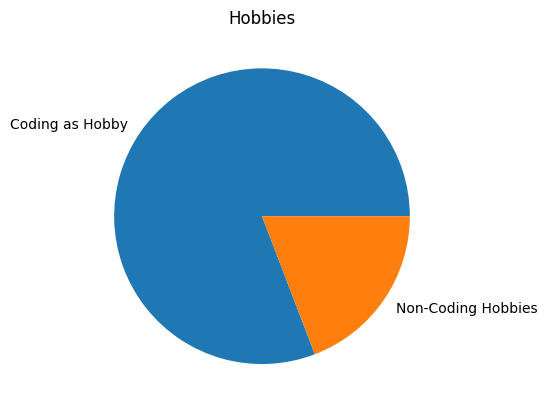

In [ ]:
#Q3
hobby_count = (data['Hobby'] == "Yes").value_counts()
hobby_labels = ["Coding as Hobby", "Non-Coding Hobbies"]
plt.pie(hobby_count.values, labels=hobby_labels)
plt.title("Hobbies")
plt.show()

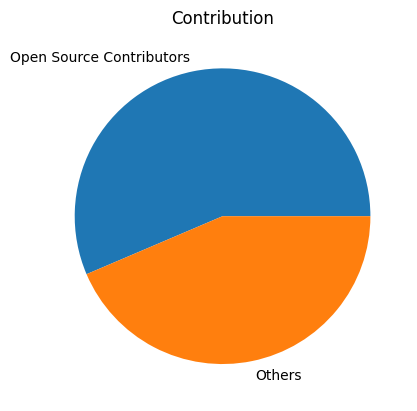

In [ ]:
#Q4
hobby_count = (data['OpenSource'] == "Yes").value_counts()
hobby_labels = ["Open Source Contributors", "Others"]
plt.pie(hobby_count.values, labels=hobby_labels)
plt.title("Contribution")
plt.show()

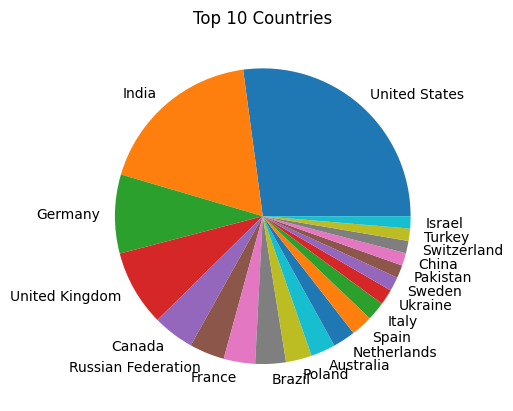

In [ ]:
#Q5
country_count = data['Country'].value_counts().head(20)
country_labels = country_count.index
plt.pie(country_count.values, labels=country_labels)
plt.title("Top 10 Countries")
plt.show()

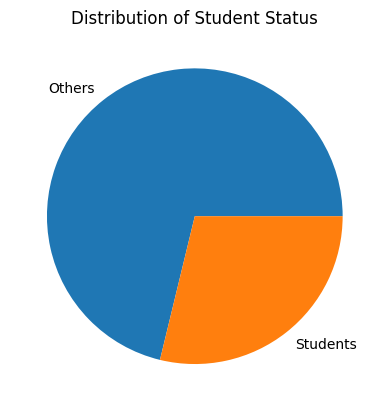

In [ ]:
#Q6
stud_count = (data['Student']=="No").value_counts()
stud_labels = ["Others", "Students"]
plt.pie(stud_count.values, labels=stud_labels)
plt.title("Distribution of Student Status")
plt.show()

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
data = fetch_openml(name='titanic', version=1, as_frame=True)
print(data)

{'data':       pclass                                             name     sex  \
0          1                    Allen, Miss. Elisabeth Walton  female   
1          1                   Allison, Master. Hudson Trevor    male   
2          1                     Allison, Miss. Helen Loraine  female   
3          1             Allison, Mr. Hudson Joshua Creighton    male   
4          1  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
...      ...                                              ...     ...   
1304       3                             Zabour, Miss. Hileni  female   
1305       3                            Zabour, Miss. Thamine  female   
1306       3                        Zakarian, Mr. Mapriededer    male   
1307       3                              Zakarian, Mr. Ortin    male   
1308       3                               Zimmerman, Mr. Leo    male   

          age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0     29.0000      0      0   24160

In [ ]:
data['feature_names']

['pclass',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
data_f = data.frame.copy()
df = data_f[['age','sex', 'fare', 'embarked', 'pclass', 'survived']].dropna()

In [ ]:
set(list(df['embarked']))

{'C', 'Q', 'S'}

In [ ]:
le = LabelEncoder()
df['embarked_le'] = le.fit_transform(df['embarked'])

In [ ]:
df.columns

Index(['age', 'sex', 'fare', 'embarked', 'pclass', 'survived', 'embarked_le'], dtype='object')

In [ ]:
ohe = OneHotEncoder()
df_ohe = pd.get_dummies(data=df, columns=['sex'])
df_ohe

,age,fare,embarked,pclass,survived,embarked_le,sex_female,sex_male
0,29.0000,211.3375,S,1,1,2,True,False
1,0.9167,151.5500,S,1,1,2,False,True
2,2.0000,151.5500,S,1,0,2,True,False
3,30.0000,151.5500,S,1,0,2,False,True
4,25.0000,151.5500,S,1,0,2,True,False
...,...,...,...,...,...,...,...,...
1301,45.5000,7.2250,C,3,0,0,False,True
1304,14.5000,14.4542,C,3,0,0,True,False
1306,26.5000,7.2250,C,3,0,0,False,True
1307,27.0000,7.2250,C,3,0,0,False,True


In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
dib = load_diabetes(as_frame=True)
dib_data = dib.frame
print(dib_data)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.0176

In [ ]:
dib_data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [ ]:
dib_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [ ]:
dib_data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


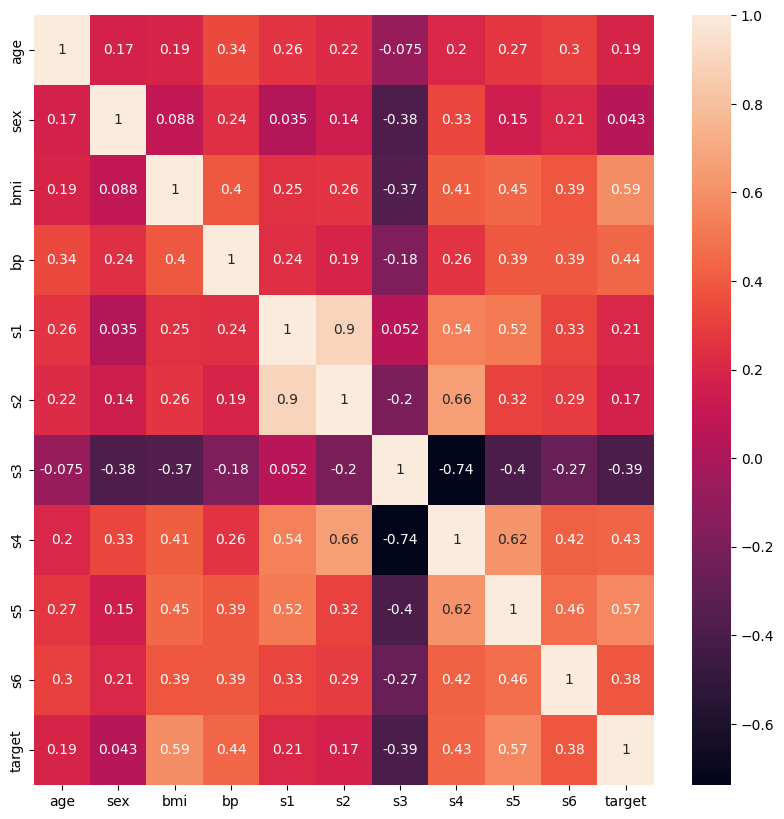

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dib_data.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dib_data.drop(columns='target'), dib_data['target'], test_size=0.2, random_state=42)
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
tree.feature_importances_

array([0.        , 0.        , 0.71152096, 0.        , 0.        ,
       0.02140973, 0.        , 0.02399568, 0.17889745, 0.06417618])

In [ ]:
importance = pd.Series(tree.feature_importances_, index=X_train.columns)
importance.sort_values(ascending=False)

,0
bmi,0.711521
s5,0.178897
s6,0.064176
s4,0.023996
s2,0.021410
age,0.000000
sex,0.000000
bp,0.000000
s1,0.000000
s3,0.000000


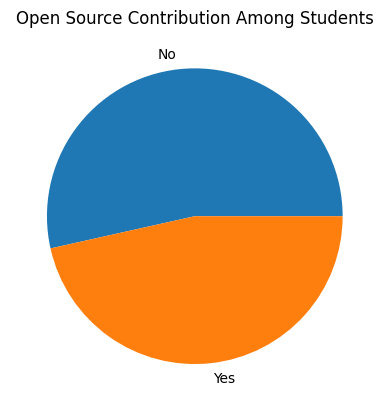

In [ ]:
#Q7
student_data = data[data['Student'].str.contains('Yes', na=False)]
student_opensource_counts = student_data['OpenSource'].value_counts()
labels = student_opensource_counts.index.tolist()
plt.pie(student_opensource_counts, labels=labels)
plt.title('Open Source Contribution Among Students')
plt.show()

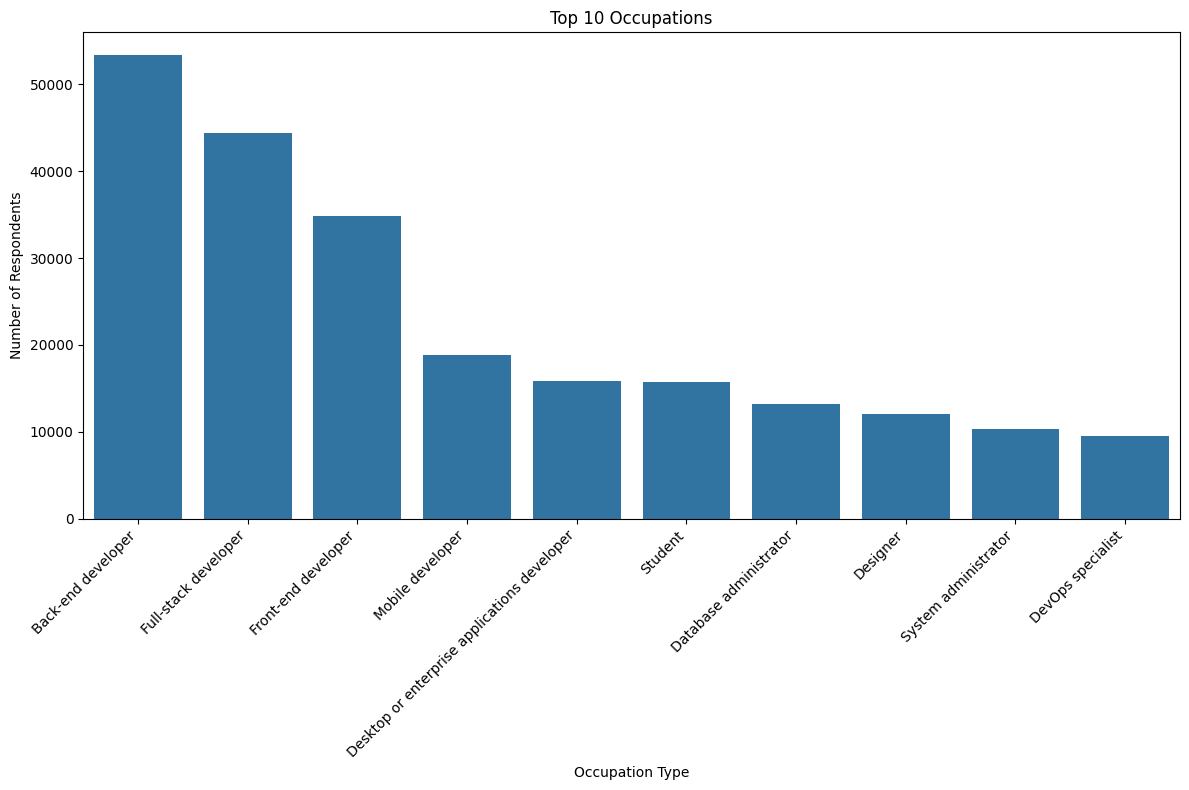

In [ ]:
#Q8
dev_types = data['DevType'].str.split(';', expand=True).stack()
dev_type_counts = dev_types.value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=dev_type_counts.index, y=dev_type_counts.values)
plt.title('Top 10 Occupations')
plt.xlabel('Occupation Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

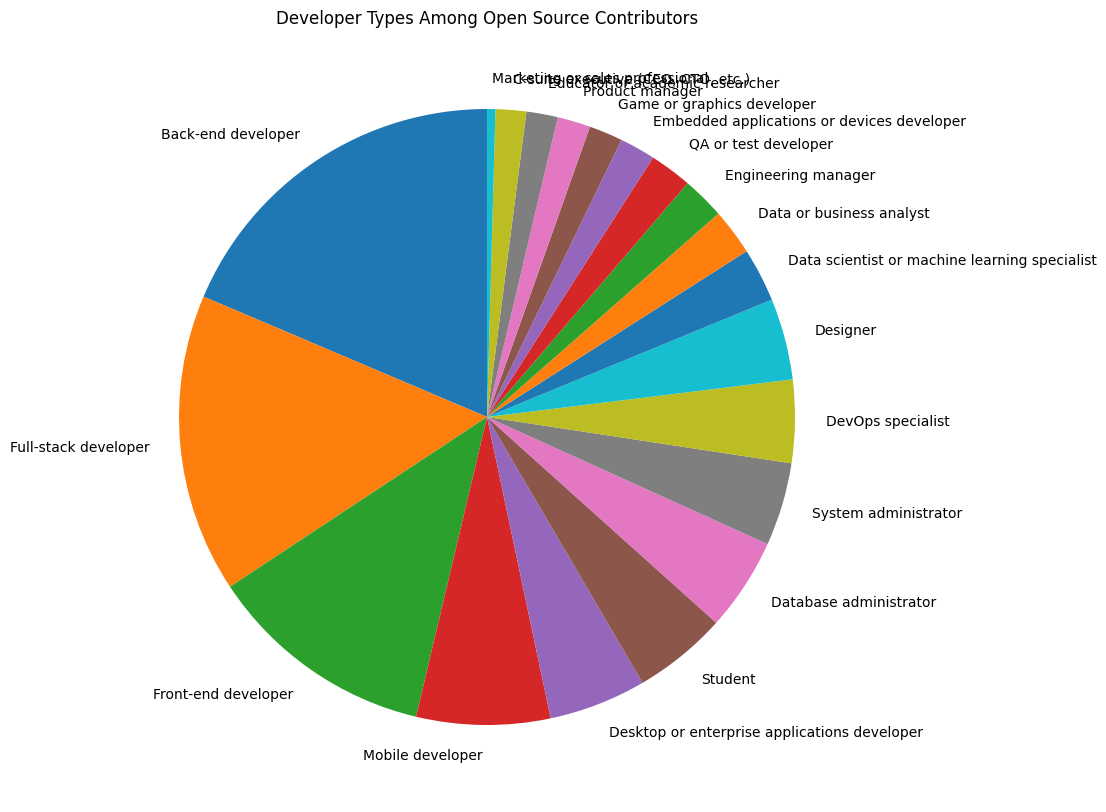

In [ ]:
#Q9
opensource_contributors = data[data['OpenSource'] == 'Yes'].copy()
contributor_dev_types = opensource_contributors['DevType'].str.split(';', expand=True).stack()
contributor_dev_type_counts = contributor_dev_types.value_counts()
plt.figure(figsize=(14, 10))
plt.pie(contributor_dev_type_counts, labels=contributor_dev_type_counts.index, startangle=90)
plt.title('Developer Types Among Open Source Contributors')
plt.show()

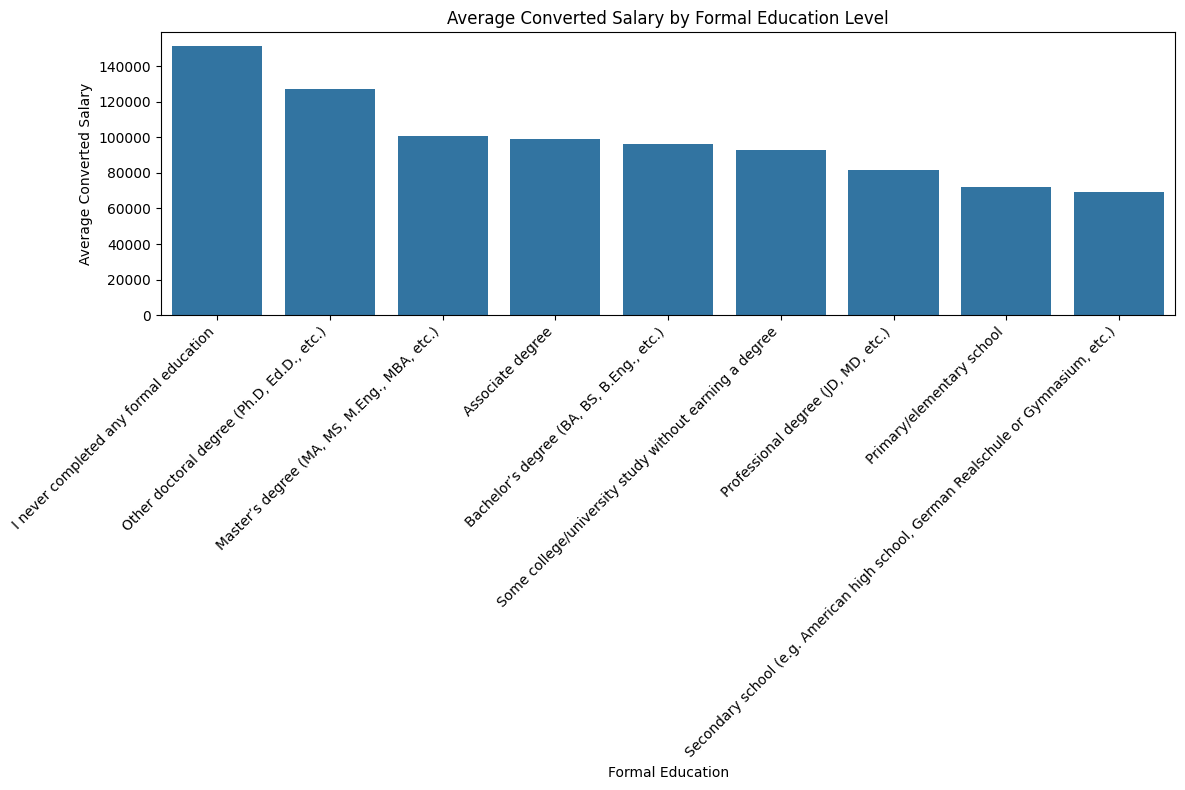

In [ ]:
#Q10
education_salary_data = data[['FormalEducation', 'ConvertedSalary']].dropna()
average_salary_by_education = education_salary_data.groupby('FormalEducation')['ConvertedSalary'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=average_salary_by_education.index, y=average_salary_by_education.values)
plt.title('Average Converted Salary by Formal Education Level')
plt.xlabel('Formal Education')
plt.ylabel('Average Converted Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()